In [1]:
import pandas as pd
import os

In [2]:
pwd

'C:\\Users\\S54201'

In [3]:
path = 'C:\\Users\\S54201\\Downloads\\titanic'

In [4]:
os.chdir(path)

In [5]:
pwd

'C:\\Users\\S54201\\Downloads\\titanic'

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Age'].isnull().sum()

177

In [9]:
import seaborn as sns

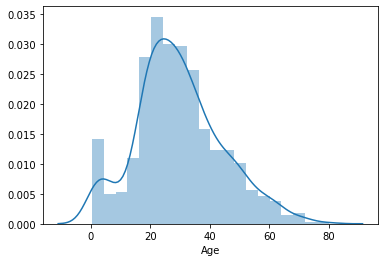

In [10]:
sns.distplot(df['Age'].dropna())

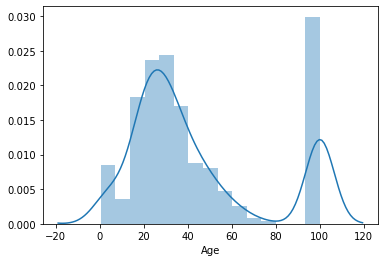

In [11]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, '#Passenger')

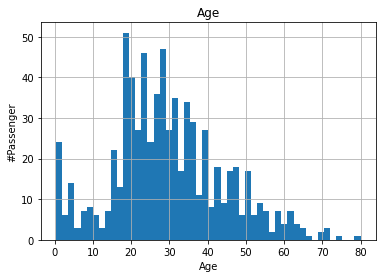

In [12]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('#Passenger')

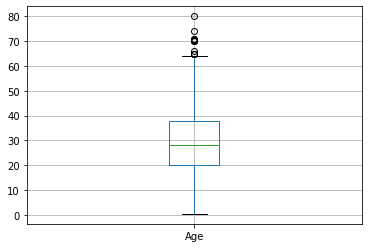

In [13]:
figure=df.boxplot(column='Age')

In [14]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
df['Age'].mean()

29.69911764705882

#### If dataset normally distributed, outliers calculated using std

In [16]:
upper_boundry = df['Age'].mean() + 3*df['Age'].std()
lower_boundry = df['Age'].mean() - 3*df['Age'].std()
print(upper_boundry), print(lower_boundry)

73.27860964406095
-13.88037434994331


(None, None)

#### Skewed outlier will be calculated using Extreme IQR

Text(0, 0.5, '#Passenger')

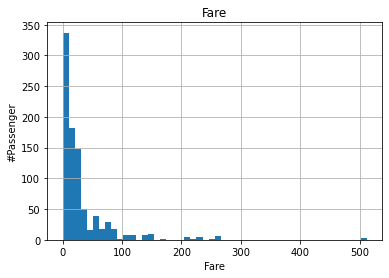

In [17]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('#Passenger')

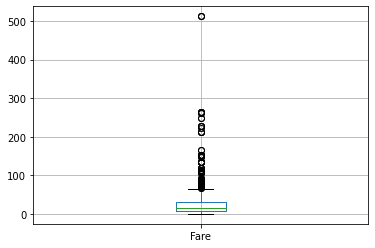

In [18]:
figure=df.boxplot(column='Fare')

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
upper_boundry = df['Fare'].mean() + 3*df['Fare'].std()
lower_boundry = df['Fare'].mean() - 3*df['Fare'].std()
print(upper_boundry), print(lower_boundry)

181.2844937601173
-116.87607782296811


(None, None)

In [21]:
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
lower_boundry = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_boundry = df['Fare'].quantile(0.75) + (IQR*1.5)
print(IQR), print(lower_boundry), print(upper_boundry)

23.0896
-26.724
65.6344


(None, None, None)

In [22]:
###Extreme outlier
lower_boundry = df['Fare'].quantile(0.25) - (IQR*3)
upper_boundry = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_boundry), print(upper_boundry)

-61.358399999999996
100.2688


(None, None)

#### Remove outlier

In [23]:
data = df.copy()

In [24]:
data.loc[data['Age']>=73,'Age']=73

In [25]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, '#Passenger')

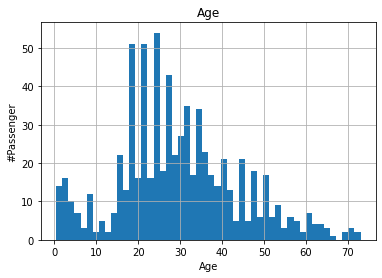

In [26]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('#Passenger')

Text(0, 0.5, '#Passenger')

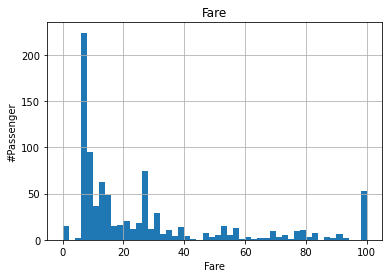

In [27]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('#Passenger')

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [46]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))
print("Confusion_martix:")
print(confusion_matrix(y_test,y_pred))
print("classification_report:")
print(classification_report(y_test,y_pred))

Accuracy_score: 0.7014925373134329
roc_auc_score: 0.7354856212696691
Confusion_martix:
[[152  19]
 [ 61  36]]
classification_report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       171
           1       0.65      0.37      0.47        97

    accuracy                           0.70       268
   macro avg       0.68      0.63      0.63       268
weighted avg       0.69      0.70      0.68       268



Note: https://www.youtube.com/watch?v=yoLpcelanpI&t=460s

In [31]:
confusion_matrix(y_test,y_pred)

array([[152,  19],
       [ 61,  36]], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred)) #use print for better presentation of classification_report

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       171
           1       0.65      0.37      0.47        97

    accuracy                           0.70       268
   macro avg       0.68      0.63      0.63       268
weighted avg       0.69      0.70      0.68       268



In [33]:
accuracy_score(y_test,y_pred)

0.7014925373134329

In [35]:
roc_auc_score(y_test,y_pred1[:,1])

0.7354856212696691

In [50]:
y_pred1

array([[0.73128686, 0.26871314],
       [0.68128812, 0.31871188],
       [0.63887431, 0.36112569],
       [0.45490406, 0.54509594],
       [0.63095126, 0.36904874],
       [0.43772701, 0.56227299],
       [0.56761107, 0.43238893],
       [0.68234745, 0.31765255],
       [0.38793043, 0.61206957],
       [0.6326688 , 0.3673312 ],
       [0.61938601, 0.38061399],
       [0.70506757, 0.29493243],
       [0.70679793, 0.29320207],
       [0.74865704, 0.25134296],
       [0.68128812, 0.31871188],
       [0.63369864, 0.36630136],
       [0.68404267, 0.31595733],
       [0.4980721 , 0.5019279 ],
       [0.7247998 , 0.2752002 ],
       [0.68406483, 0.31593517],
       [0.63564311, 0.36435689],
       [0.69624917, 0.30375083],
       [0.68128812, 0.31871188],
       [0.72205154, 0.27794846],
       [0.20677848, 0.79322152],
       [0.71642929, 0.28357071],
       [0.62691269, 0.37308731],
       [0.70532334, 0.29467666],
       [0.59300031, 0.40699969],
       [0.67969561, 0.32030439],
       [0.